## Sea Level Predictor
#### A simple example to interpolate a line of best fit using linear regression, in particular using the **linregress** function made available by scipy.stats
#### In the example, we import the file containing EPA historical data about sea levels, and conduct a first exploration. Then, we proceed with the linear regression, which is then used for a simple prediction about future sea levels until 2050.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("../csv/epa-sea-level.csv")

years = df["Year"]
csiro_sea_level = df["CSIRO Adjusted Sea Level"]

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [10]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


Since we are only interested in the CSIRO Adjusted Sea Level for this example, let's drop un-necessary columns.

In [11]:
df.drop(columns=["Lower Error Bound","Upper Error Bound","NOAA Adjusted Sea Level"], inplace=True)

In [12]:
df.head()

,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551


The **linregress** function from scipy.stats calculates the linear regression given an x and a y set of data given as input. It returns a *LinregressResult* comprising of slope, intercept, rvalue, stderr and so on, that you can access as attributes of the linregress object, after it is stored it in an appropriate variable (**res** in this case). To create the line in itself, we can just apply the equation describing lines: y = intercept + slope*x

Since we want not only the line of best fit for the available data, but a prediction extending this line until 2050, we create an extended x axis using NumPy **linspace**.

In addition, we are going to create two separate predictions. The first takes into account the entire timespan we have available data for (so from 1880 onwards), and plots the resulting line of best fit until 2050. 
The second prediction, instead, restricts the sample to only the observations from 2000 onwards.

In [13]:
#First prediction, entire timespan
res = linregress(years, csiro_sea_level)
x_extended = np.linspace(years[0],2051)
line = res.slope*x_extended + res.intercept

#Second prediction, from 2000 onwards. 
subset_df = df[df["Year"]>=2000]
res_subset = linregress(subset_df["Year"],subset_df["CSIRO Adjusted Sea Level"])
x_subset_extended = np.linspace(subset_df["Year"], 2051)
line_subset = res_subset.intercept + res_subset.slope*x_subset_extended


In [4]:
res

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

Text(0.5, 1.0, 'Rise in Sea Level')

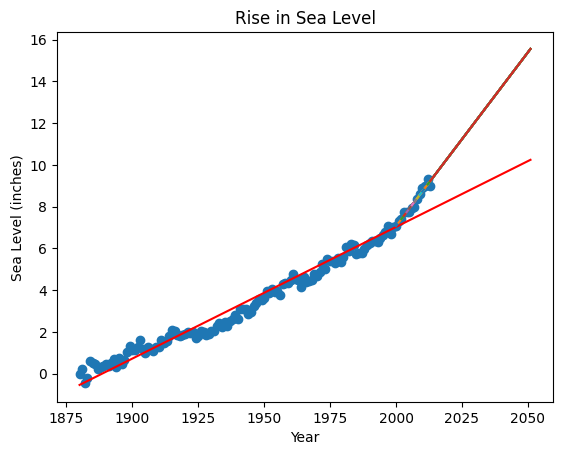

In [5]:
fig, ax = plt.subplots()
ax.scatter(years, y=df["CSIRO Adjusted Sea Level"])
ax.plot(x_extended,line, "r")
ax.plot(x_subset_extended,line_subset)

ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")


Below you can find the plot for only the time span from 2000 onwards, related to the second prediction we just outlined.

In [17]:
res_subset = linregress(subset_df["Year"],subset_df["CSIRO Adjusted Sea Level"])
x_subset_extended = np.linspace(subset_df["Year"], 2051)
line_subset = res_subset.intercept + res_subset.slope*x_subset_extended

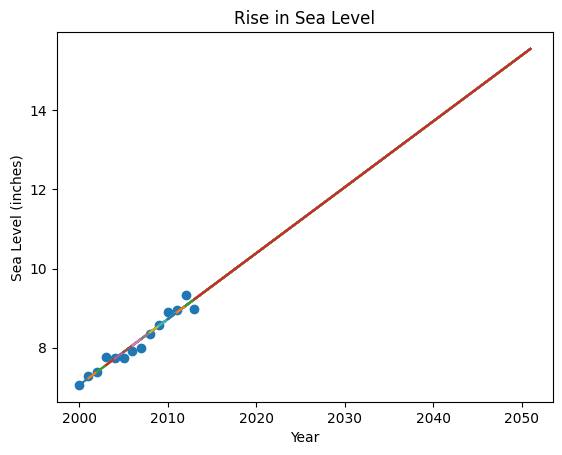

In [18]:
fig, ax = plt.subplots()
ax.scatter(subset_df["Year"],subset_df["CSIRO Adjusted Sea Level"])
ax.plot(x_subset_extended,line_subset)
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")

plt.show()